Titanic data dictionary

#survival:    Survival 
#PassengerId: Unique Id of a passenger. 
#pclass:    Ticket class     
#sex:    Sex     
#Age:    Age in years     
#sibsp:    # of siblings / spouses aboard the Titanic     
#parch:    # of parents / children aboard the Titanic     
#ticket:    Ticket number     
#fare:    Passenger fare     
#cabin:    Cabin number     
#embarked:    Port of Embarkation

In [47]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
train_df = pd.read_csv('data/Titanic.csv',index_col=0)

train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let’s take a more detailed look at what data is actually missing:

In [48]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. 
The ‘Age’ feature, which has 177 missing values. 
The ‘Cabin’ feature needs further investigation, since 77 % of it are missing.

In [49]:
train_df.columns.values


array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Above you can see the 11 features + the target variable (survived). 
What features could contribute to a high survival rate ?
To me it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

Checking Age and Sex 

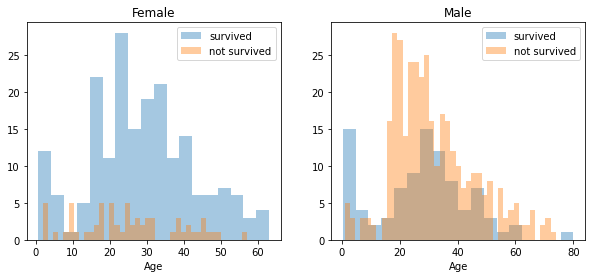

In [50]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


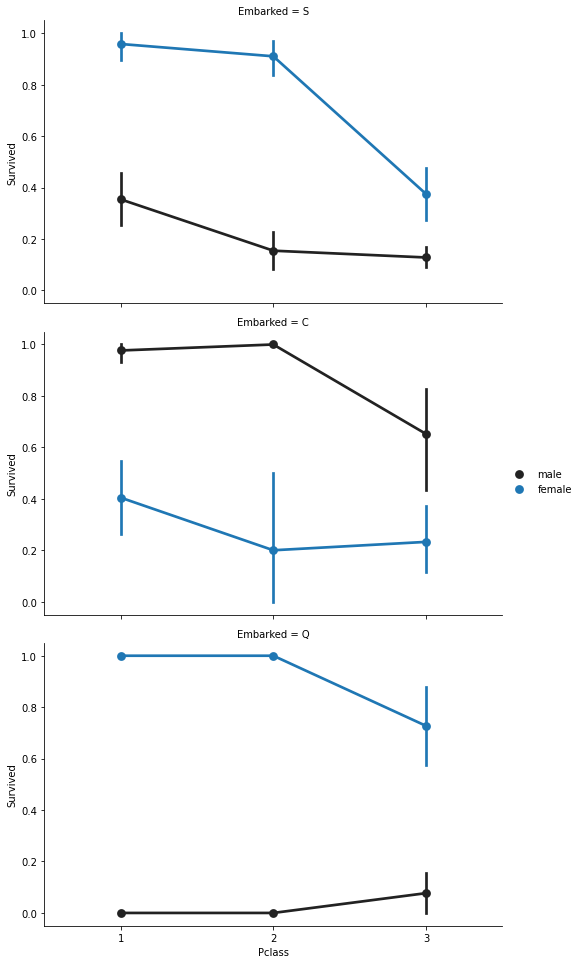

In [51]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

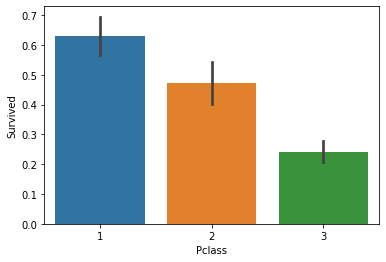

In [52]:
sns.barplot(x='Pclass', y='Survived', data=train_df)


D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


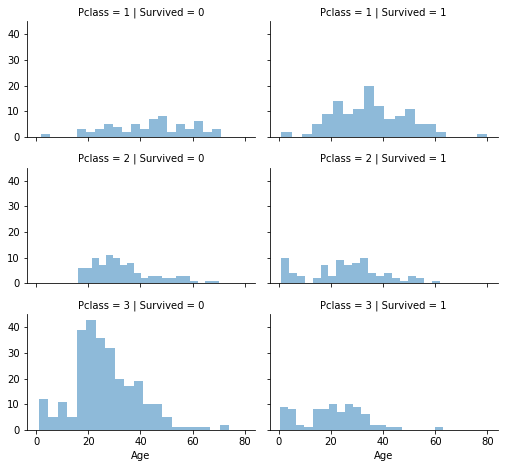

In [53]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Create new feature, alone and not alone

In [54]:
data = [train_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


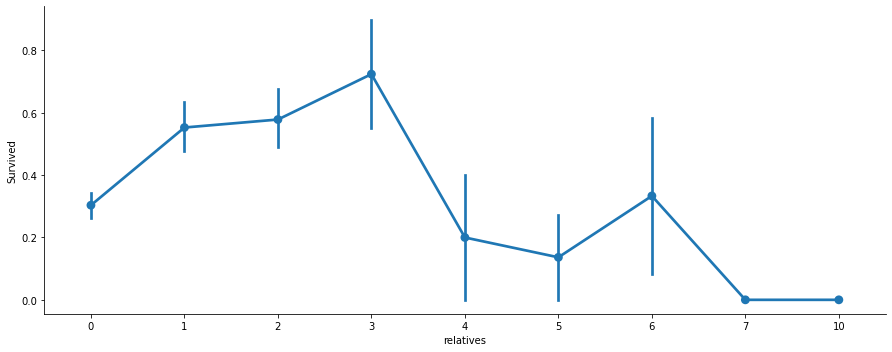

In [55]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

#Survived increase when relative between 0 and 3, but decrease at 4 or more

In [56]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


New feature Deck from Cabin

In [57]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df]

train_df.head()

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)


In [58]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [59]:
train_df["Age"].isnull().sum()

177

In [60]:
#fill the null age with random data

In [61]:
data = [train_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [62]:
train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [63]:
#Replace NaN in embarked feature
common_value = 'S'
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [64]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 127.0+ KB


In [65]:
#Replace NaN in Fare feature

data = [train_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [66]:
#Categorize the title feature into numeric
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [train_df]

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)


In [67]:
#Categorize ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}
data = [train_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [68]:
train_df['Ticket'].describe()


count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [69]:
train_df = train_df.drop(['Ticket'], axis=1)


In [70]:
#Categorize the Embarked feature into numeric

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


In [71]:
data[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,22,1,0,7,0,1,0,8,1
2,1,1,1,38,1,0,71,1,1,0,3,3
3,1,3,1,26,0,0,7,0,0,1,8,2
4,1,1,1,35,1,0,53,0,1,0,3,3
5,0,3,0,35,0,0,8,0,0,1,8,1


In [72]:
data[0].Age.unique()

array([22, 38, 26, 35, 20, 54,  2, 27, 14,  4, 58, 39, 55, 31, 43, 34, 15,
       28,  8, 19, 30, 40, 17, 16, 66, 42, 24, 21, 18,  3, 29, 37,  7, 49,
       65,  5, 11, 45, 32, 25,  0, 33, 23, 46, 59, 71, 41, 47, 70, 12,  9,
       36, 51, 44,  1, 61, 56, 50, 62, 52, 63, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [73]:
#Convert age feature into new age range feature

data = [train_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [74]:
train_df['Age'].value_counts()

4    175
6    168
5    139
3    137
2    113
1     91
0     68
Name: Age, dtype: int64

Fare:
For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. 


In [75]:
train_df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
PassengerId,,,,,,,,,,,,
1,0,3,0,2,1,0,7,0,1,0,8,1
2,1,1,1,5,1,0,71,1,1,0,3,3
3,1,3,1,3,0,0,7,0,0,1,8,2
4,1,1,1,5,1,0,53,0,1,0,3,3
5,0,3,0,5,0,0,8,0,0,1,8,1
6,0,3,0,2,0,0,8,2,0,1,8,1
7,0,1,0,6,0,0,51,0,0,1,5,1
8,0,3,0,0,3,1,21,0,4,0,8,4
9,1,3,1,3,0,2,11,0,2,0,8,3


In [76]:
data = [train_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

Creating new Features
I will add two new features to the dataset, that I compute out of other features.
1. Age times Class

In [77]:
data = [train_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

2. Fare per Person


In [78]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
PassengerId,,,,,,,,,,,,,,
1,0,3,0,2,1,0,0,0,1,0,8,1,6,0
2,1,1,1,5,1,0,3,1,1,0,3,3,5,1
3,1,3,1,3,0,0,0,0,0,1,8,2,9,0
4,1,1,1,5,1,0,3,0,1,0,3,3,5,1
5,0,3,0,5,0,0,1,0,0,1,8,1,15,1
6,0,3,0,2,0,0,1,2,0,1,8,1,6,1
7,0,1,0,6,0,0,3,0,0,1,5,1,6,3
8,0,3,0,0,3,1,2,0,4,0,8,4,0,0
9,1,3,1,3,0,2,1,0,2,0,8,3,9,0


Now we will train several Machine Learning models and compare their results. 


In [79]:
from sklearn.model_selection import train_test_split
#split train dataset to 80% for training and 20% for testing
train, test = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()


Stochastic Gradient Descent (SGD):


In [80]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


Random Forest:


In [81]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


In [82]:
#Logistic Regression:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)


In [83]:
#K Nearest Neighbor:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)


In [84]:
#Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)


In [85]:
#Perceptron:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [86]:
#Linear Support Vector Machine:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [87]:
#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


In [88]:
#Which is the best Model ?
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
92.56,Random Forest
92.56,Decision Tree
87.22,KNN
81.74,Support Vector Machines
81.60,Logistic Regression
77.39,Naive Bayes
76.40,Stochastic Gradient Decent
41.99,Perceptron


As we can see, the Random Forest classifier goes on the first place. 
But first, let us check, how random-forest performs, when we use cross validation.


In [89]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.81944444 0.76388889 0.76056338 0.85915493 0.8028169  0.73239437
 0.83098592 0.8028169  0.81690141 0.92957746]
Mean: 0.8118544600938966
Standard Deviation: 0.05287141451576219


Our model has a average accuracy of 82% with a standard deviation of 4 %.



Feature Importance



In [90]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)


,importance
feature,
Title,0.214
Sex,0.159
Age_Class,0.087
Deck,0.084
Age,0.081
Pclass,0.074
Fare,0.067
relatives,0.063
Embarked,0.053


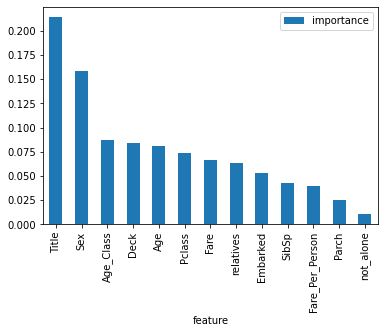

In [91]:
#plot the importance of the features
importances.plot.bar()


Conclusion:
not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. 

Drop the features one by one

Drop not_alone

train  = train.drop("not_alone", axis=1)
test  = test.drop("not_alone", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Drop Parch feature

train  = train.drop("Parch", axis=1)
test  = test.drop("Parch", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

drop Fare_Per_Person feature

train  = train.drop("Fare_Per_Person", axis=1)
test  = test.drop("Fare_Per_Person", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

drop Embarked feature

train  = train.drop("Embarked", axis=1)
test  = test.drop("Embarked", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Drop SibSp feature

train  = train.drop("SibSp", axis=1)
test  = test.drop("SibSp", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Drop AgeClass

train  = train.drop("Age_Class", axis=1)
test  = test.drop("Age_Class", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Drop fare feature and let's see

train  = train.drop("Fare", axis=1)
test  = test.drop("Fare", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Drop relatives feature

train  = train.drop("relatives", axis=1)
test  = test.drop("relatives", axis=1)

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1).copy()

#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

#oob score
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

Our random forest model score start to decrease (but not big difference) when i remove the following features: 
Embarked,SibSp, relatives, and Fare



For All 4 bottom features (Age_Class, Parch, not_alone, and Fare_Per_Person features) there is no impact in the score when i drop this feature.


A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. 
Since i'm a beginner in Machine Learning, i can't verify whether the model is overfitting or not.

Hyper parameter tuning

from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 10,
 'min_samples_split': 25,
 'n_estimators': 400}

In [93]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 10, 
                                       min_samples_split = 25,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.28999999999999 %


In [94]:
print(round(acc_random_forest,2,), "%")

92.56 %


In [95]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[401,  43],
       [ 75, 193]], dtype=int64)

In [96]:
#Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8177966101694916
Recall: 0.7201492537313433


In [97]:
#F-Score
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)


0.7658730158730158

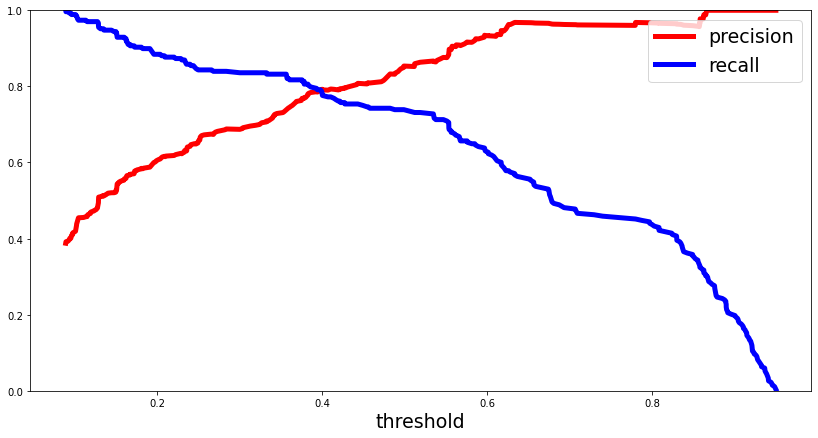

In [98]:
#plot the precision and recall with the threshold using matplotlib:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


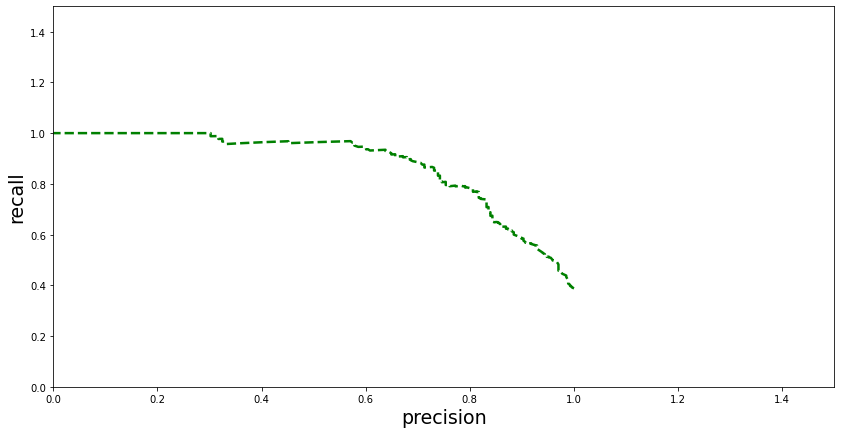

In [99]:
#Another way is to plot the precision and recall against each other:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

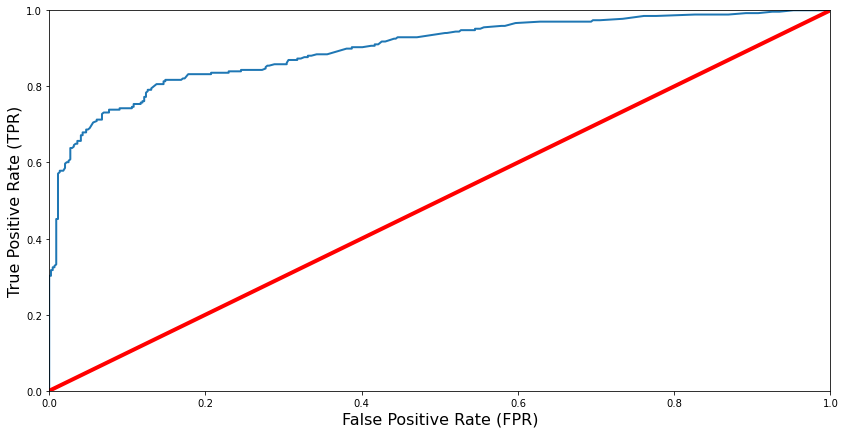

In [100]:
#Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. 
#This curve plots the true positive rate (also called recall) 
#against the false positive rate (ratio of incorrectly classified negative instances), 
#instead of plotting the precision versus the recall.
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [101]:
#ROC AUC Score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)


ROC-AUC-Score: 0.8989595939222805
